In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from pandas import DataFrame
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
import operator
import os

from sklearn.cluster import KMeans
from itertools import chain
import mahotas as mt

In [2]:
folder_path = r'C:\Users\Joe\Desktop\UNI\Yr3\Dissertation\Datasets\train_svm_DS'
full_path_files = []
root_list = []
dir_list = []
file_names = []
img_labels = []


for (root, dir, file) in os.walk(folder_path, topdown=True):
    root_list.append(root)
    dir_list.append(dir)
    file_names.append(file)

#remove root dir
root_list.pop(0)

for dir in range(len(root_list)):
    for f in file_names[dir+1]:
        img_labels.append(dir_list[0][dir])
        temp_name = os.path.join(root_list[dir], f)
        full_path_files.append(temp_name)


#flatten file names list
file_names = list(chain.from_iterable(file_names))


In [3]:
svm_train_db = []
for f in full_path_files:
    img = cv2.imread(f)
    img = cv2.resize(img, (100, 100))
    if img is not None:
        svm_train_db.append(img)


In [4]:
import M2 as M2

In [5]:
img_subset = [svm_train_db[a] for a in range(8)]
img_feats = M2.process_M2(img_subset)

results = []
clf = M2.load_svm()
for feat in img_feats:
    results.append(M2.predict(clf, feat))

print(results)


Loading Model
Predicted: ['scorpion']
Predicted: ['saxophone']
Predicted: ['scorpion']
Predicted: ['soccer_ball']
Predicted: ['grand_piano']
Predicted: ['saxophone']
Predicted: ['saxophone']
Predicted: ['water_lilly']
[array(['scorpion'], dtype='<U11'), array(['saxophone'], dtype='<U11'), array(['scorpion'], dtype='<U11'), array(['soccer_ball'], dtype='<U11'), array(['grand_piano'], dtype='<U11'), array(['saxophone'], dtype='<U11'), array(['saxophone'], dtype='<U11'), array(['water_lilly'], dtype='<U11')]


In [6]:
test_p, test_f = M2.process_query_M2(svm_train_db[222])


Loading Model
Predicted: ['saxophone']


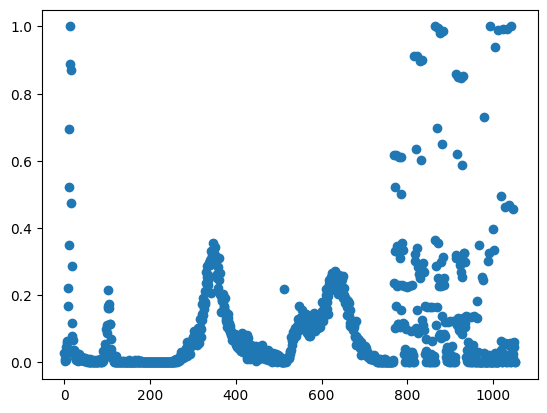

In [7]:
plt.scatter(np.arange(0, test_f.shape[0]), test_f)


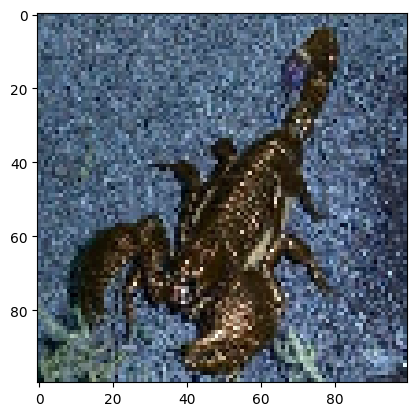

In [8]:
plt.imshow(svm_train_db[222])
